# Multiclass Classification, logistic regression Lesson 80: 

In [2]:
# Iris Flower dataset: (same with the book)
# Iris setosa, Iris virginica and Iris versicolor

In [3]:
# One Vs. All is one way to run multiclass => one with highest confidence is assigned to test data

In [17]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline


In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris_data = DataFrame(X, columns = ['Sepal length','Sepal Width','Petal Length','Petal Width']) 
iris_target = DataFrame(Y, columns = ['Species'])

In [9]:
iris_target.head()   # The data is just {0,1,2} right now. 

,Species
0,0
1,0
2,0
3,0
4,0


In [15]:
def flower(num):
    if num ==0:
        return 'setosa'
    elif num ==1:
        return 'versicolor'
    else:
        return 'virginica'
    

In [26]:
 iris_target['Species']= iris_target['Species'].apply(flower)

In [27]:
iris_target.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [28]:
iris = pd.concat([iris_data, iris_target], axis = 1)

In [32]:
print(iris.head())
iris.groupby(['Species']).count()

   Sepal length  Sepal Width  Petal Length  Petal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,Sepal length,Sepal Width,Petal Length,Petal Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


#Now that everything is cleaned and on 1 DF, DataVisualization analysis

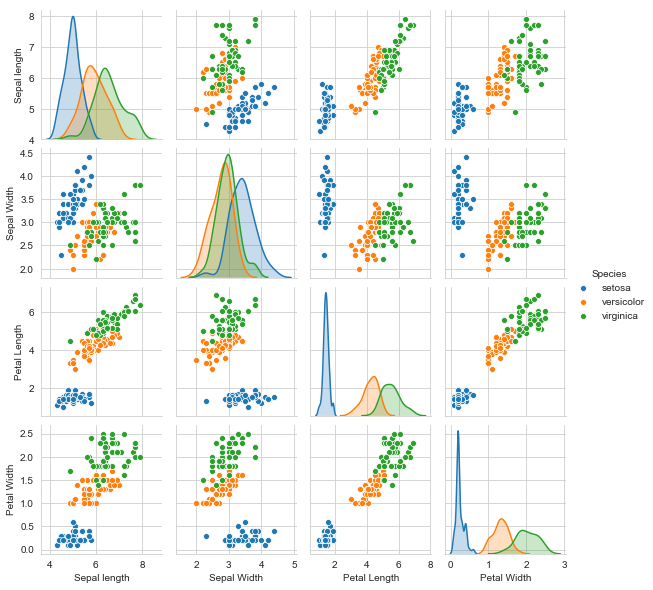

In [31]:
sns.pairplot(iris, hue = 'Species', height = 2)

# Multiclass classification using k Nearest Neighbor

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
'''
X = iris.data
Y = iris.target
1. model
2. fit()  => training model is made
3. score() //accuracy
'''
logreg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 3)   

In [40]:
logreg.fit(X_train, Y_train)   #training is done 
from sklearn import metrics
# logreg.score()   #check the accuracy of the testing set 
Y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))



0.9666666666666667


c:\users\dicei\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# K Nearest Neighbor

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors = 6)  #Parameter n_neighbors determines the number of K's to hit. 


In [44]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [45]:
Y_pred = knn.predict(X_test)

In [46]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [47]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [48]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
Y_pred = knn.predict(X_test)

In [50]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


# How do we know what K to use?  (for n_neighbors value?)

In [51]:
k_range = range(1,21)
accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    
    

Text(0, 0.5, 'Test Accuracy')

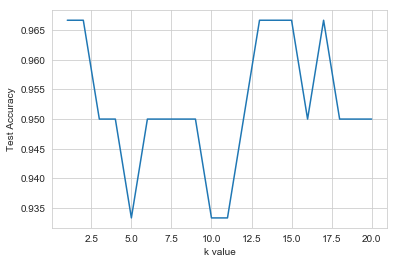

In [52]:
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Test Accuracy')